In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
length = pd.read_csv('length.csv').drop(['Unnamed: 0', 'id'], axis=1)
depth = pd.read_csv('depth.csv').drop(['Unnamed: 0', 'id'], axis=1)
number = pd.read_csv('subject_number.csv').drop(['Unnamed: 0', 'id'], axis=1)

In [120]:
layer = length.iloc[:7]['layer']

datasets_length = []
datasets = []

for i in range(0,len(depth), 7):
    dataset = depth.iloc[i:i+7, 2:6]
    
    datasets.append([dataset[i].to_list() for i in dataset.columns])

No handles with labels found to put in legend.


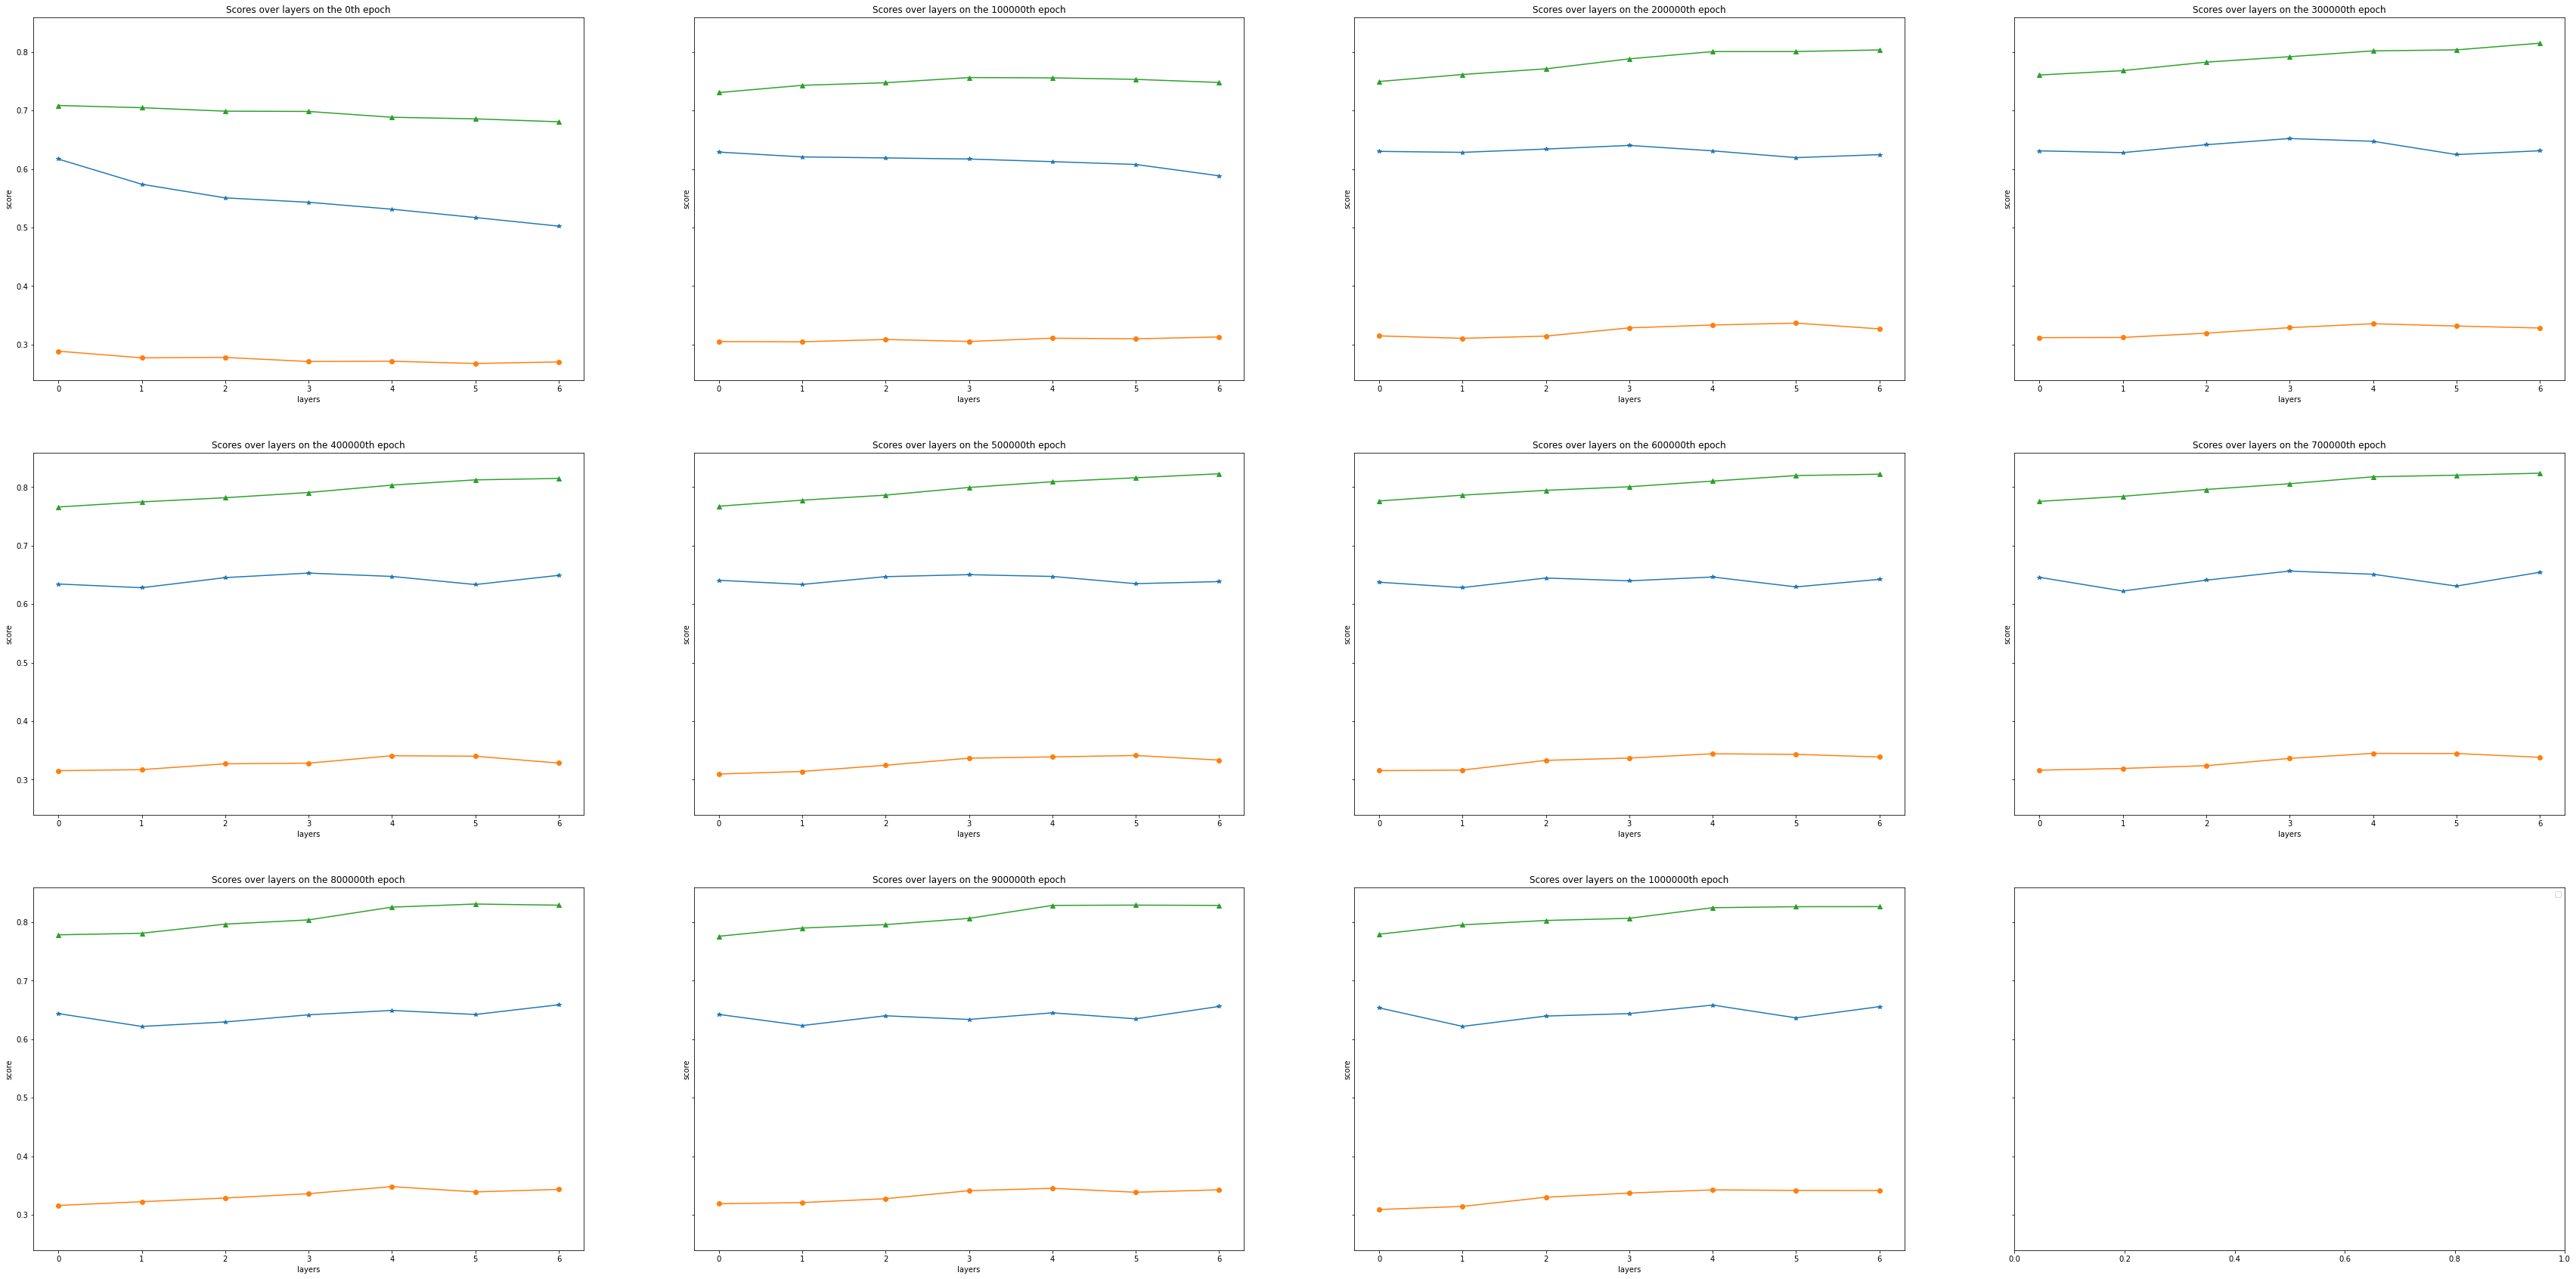

In [121]:
datasets = datasets[::-1]
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(60, 30), sharey=True)

x = 0
j = 0
for i, df in enumerate(datasets):
    i = i *100000
    layers = ax[x, j].plot(layer, length[length['epoche']==i]['accuracy'], label='length', marker='*')
    layers = ax[x, j].plot(layer, depth[depth['epoche']==i]['accuracy'], label='depth', marker='o')
    layers = ax[x, j].plot(layer, number[number['epoche']==i]['accuracy'], label='subject number', marker='^')
    layers = ax[x, j].set_xlabel('layers')
    layers = ax[x, j].set_ylabel('score')
    layers = ax[x, j].set_title(f'Scores over layers on the {i}th epoch')
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1

plt.legend()
plt.show()

In [122]:
def plot_accuracy(df):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)

    x = 0
    j = 0
    epoches = set(df['epoche'])
    layer = df.iloc[:7]['layer']
    for i in range(0, len(epoches), 3):
        if i == 0:
            r, b, g = [1, 0, 0]
        elif i == 3:
            r, b, g = [0.2, 1, 0]
        elif i == 6:
            r, b, g = [0, 0.5, 1]
        else:
            r, b, g = [0.7, 0.5, 0]
        i = i * 100000
        layers = ax[x, j].plot(layer, df[df['epoche'] == i]['accuracy'], color=(r, b, g, 0.3))
        layers = ax[x, j].plot(layer, df[df['epoche'] == i+100000]['accuracy'],color=(r, b, g, 0.5))
        if i+200000 < 1000000:
            layers = ax[x, j].plot(layer, df[df['epoche'] == i+200000]['accuracy'], color=(r, b, g, 0.8))
        layers = ax[x, j].set_xlabel('layers')
        layers = ax[x, j].set_ylabel('score')
        layers = ax[x, j].set_title(f'Scores over layers on the {i}, {i+100000}, and {i+200000}th epoches')
        if j != 1:
            j += 1
        else:
            j = 0
            x += 1

    plt.show()

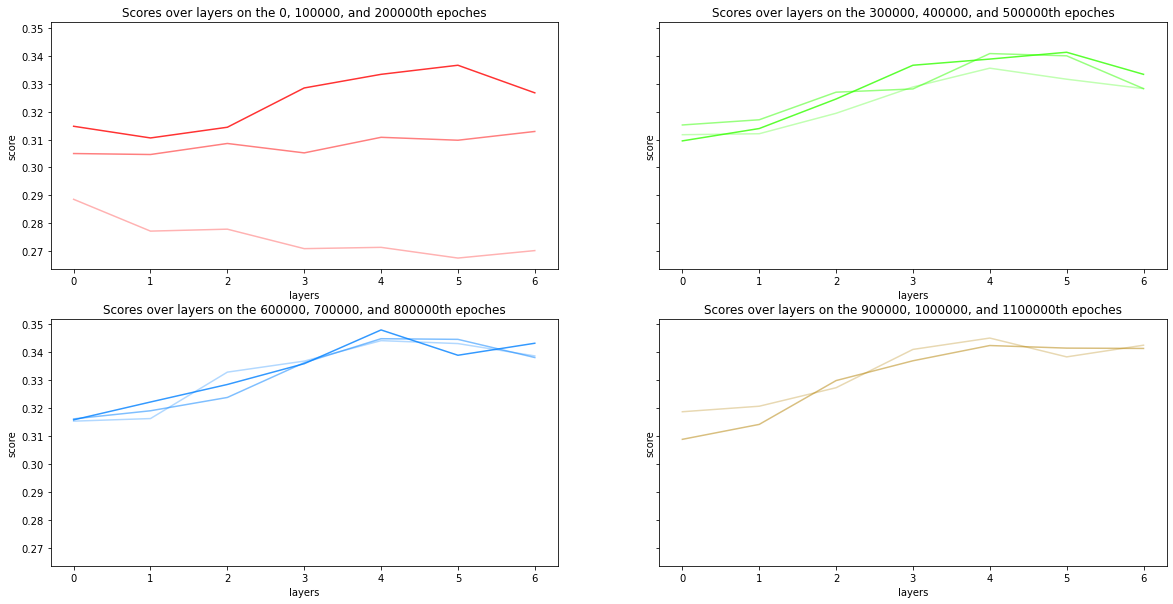

In [123]:
plot_accuracy(depth)

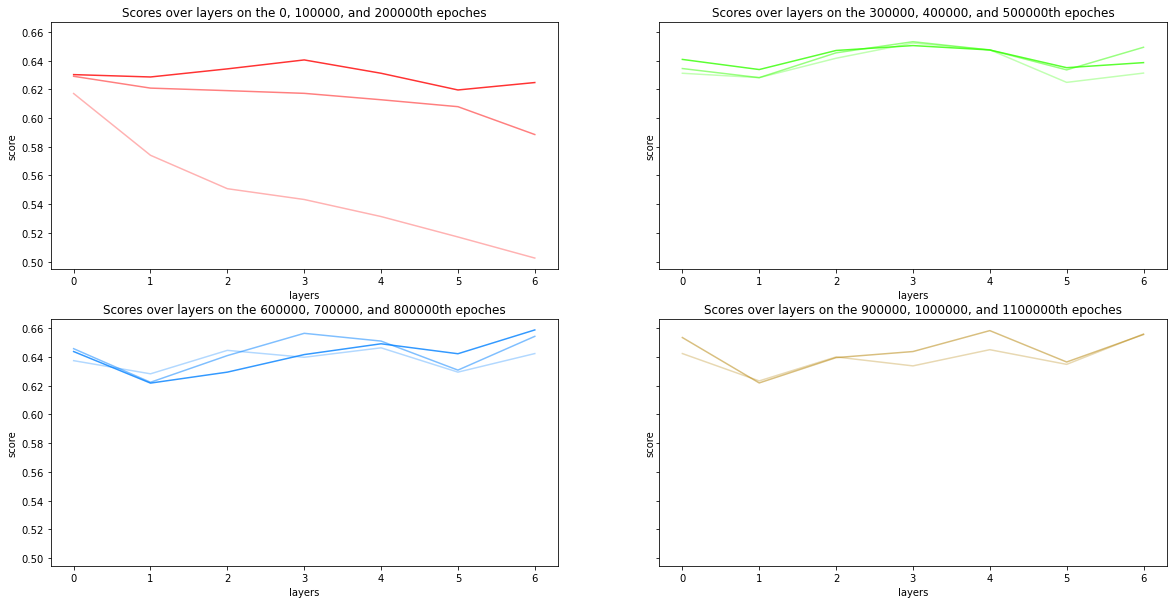

In [124]:
plot_accuracy(length)

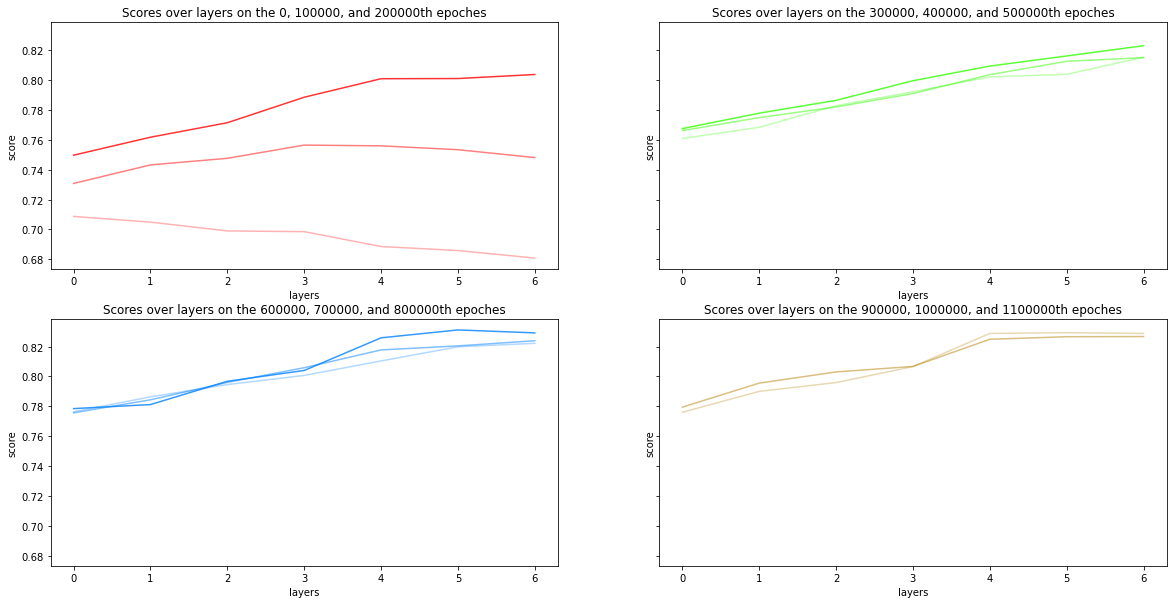

In [125]:
plot_accuracy(number)